In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
df = pd.read_csv(('sickness_table.csv') , index_col=0)
df['date'] = pd.to_datetime(df['date'])

In [3]:
df.head()

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [4]:
# Check for missing values
print(df.isnull().sum())

date        0
n_sick      0
calls       0
n_duty      0
n_sby       0
sby_need    0
dafted      0
dtype: int64


In [5]:
# Descriptive statistics
print(df.describe())

                      date       n_sick         calls       n_duty   n_sby  \
count                 1152  1152.000000   1152.000000  1152.000000  1152.0   
mean   2017-10-28 12:00:00    68.808160   7919.531250  1820.572917    90.0   
min    2016-04-01 00:00:00    36.000000   4074.000000  1700.000000    90.0   
25%    2017-01-13 18:00:00    58.000000   6978.000000  1800.000000    90.0   
50%    2017-10-28 12:00:00    68.000000   7932.000000  1800.000000    90.0   
75%    2018-08-12 06:00:00    78.000000   8827.500000  1900.000000    90.0   
max    2019-05-27 00:00:00   119.000000  11850.000000  1900.000000    90.0   
std                    NaN    14.293942   1290.063571    80.086953     0.0   

          sby_need       dafted  
count  1152.000000  1152.000000  
mean     34.718750    16.335938  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%      12.250000     0.000000  
max     555.000000   465.000000  
std      79.694251    53.

C:\Users\thimm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


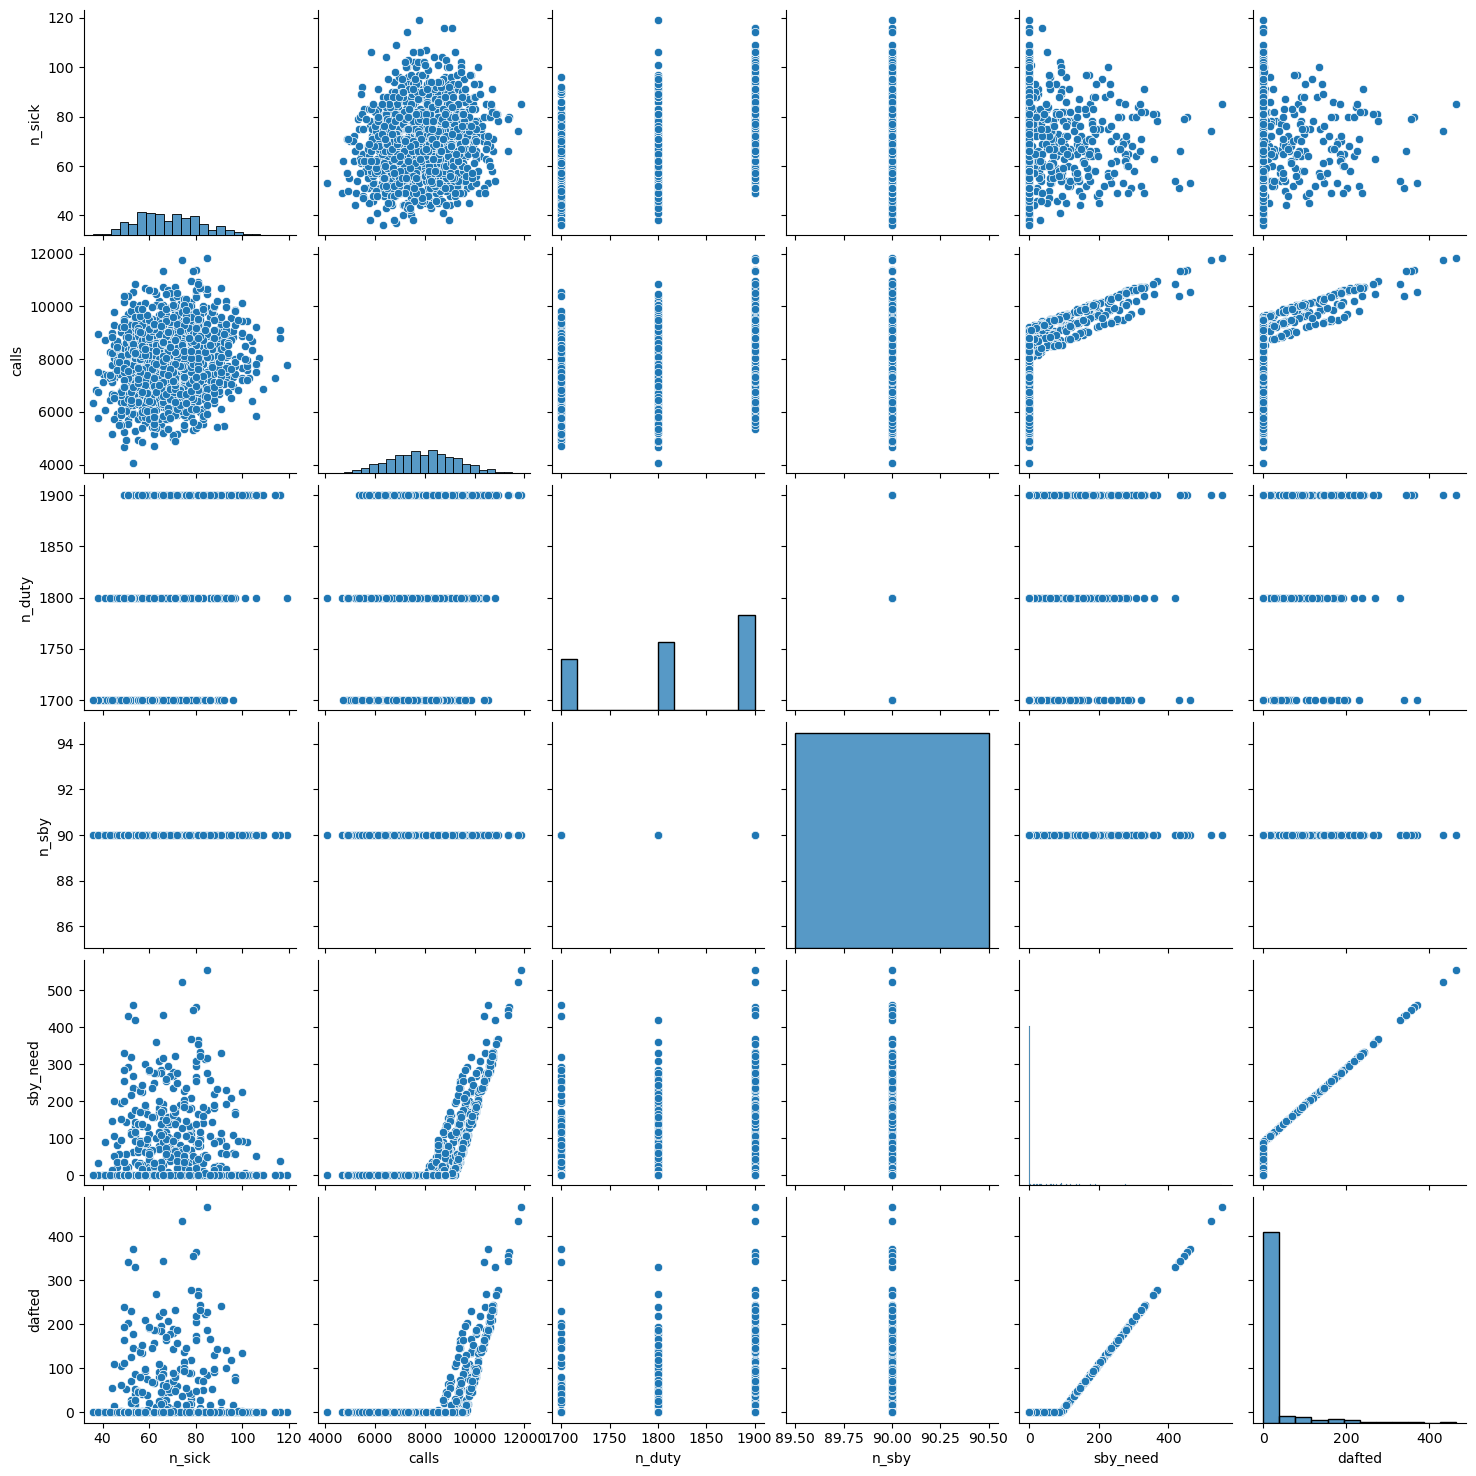

In [6]:
# Visualize the data
sns.pairplot(df)
plt.show()

Data Overview:
        date  n_sick   calls  n_duty  n_sby  sby_need  dafted
0 2016-04-01      73  8154.0    1700     90       4.0     0.0
1 2016-04-02      64  8526.0    1700     90      70.0     0.0
2 2016-04-03      68  8088.0    1700     90       0.0     0.0
3 2016-04-04      71  7044.0    1700     90       0.0     0.0
4 2016-04-05      63  7236.0    1700     90       0.0     0.0


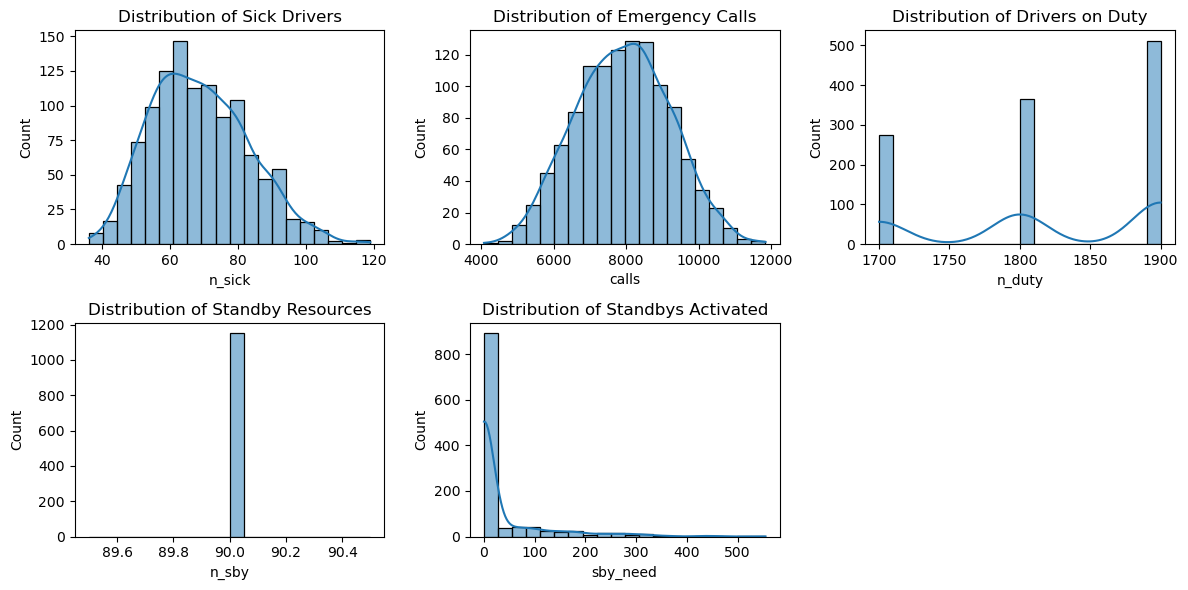

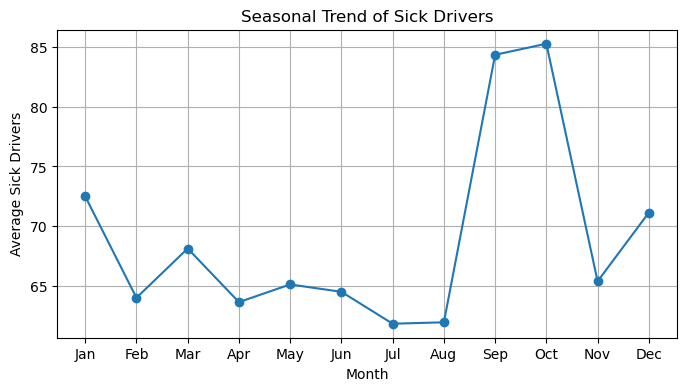

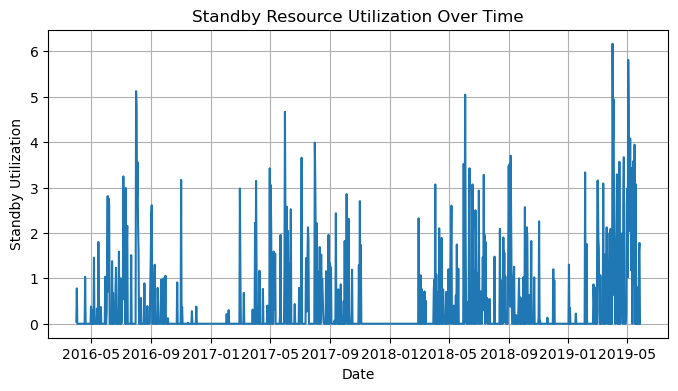

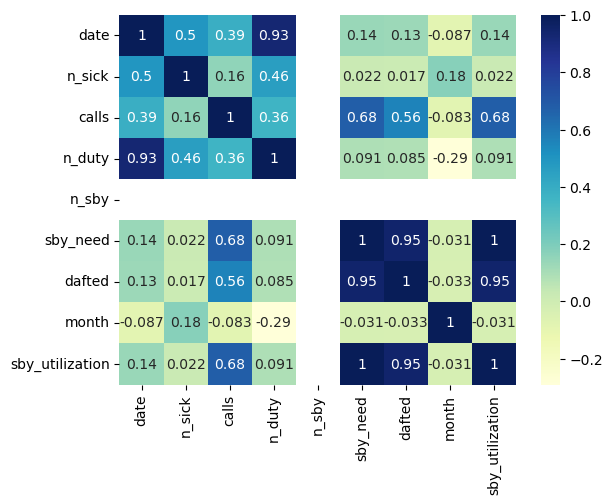

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming the file is named "sickness_table.csv")
df = pd.read_csv(('sickness_table.csv') , index_col=0 ,parse_dates=["date"])
df['date'] = pd.to_datetime(df['date'])

# Data Overview
print("Data Overview:")
print(df.head())

# Initial Data Exploration
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(df["n_sick"], bins=20, kde=True)
plt.title("Distribution of Sick Drivers")

plt.subplot(2, 3, 2)
sns.histplot(df["calls"], bins=20, kde=True)
plt.title("Distribution of Emergency Calls")

plt.subplot(2, 3, 3)
sns.histplot(df["n_duty"], bins=20, kde=True)
plt.title("Distribution of Drivers on Duty")

plt.subplot(2, 3, 4)
sns.histplot(df["n_sby"], bins=20, kde=True)
plt.title("Distribution of Standby Resources")

plt.subplot(2, 3, 5)
sns.histplot(df["sby_need"], bins=20, kde=True)
plt.title("Distribution of Standbys Activated")

plt.tight_layout()
plt.show()

# Seasonal Patterns
df["month"] = df["date"].dt.month
monthly_sick = df.groupby("month")["n_sick"].mean()

plt.figure(figsize=(8, 4))
plt.plot(monthly_sick.index, monthly_sick.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Average Sick Drivers")
plt.title("Seasonal Trend of Sick Drivers")
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

# Standby Resource Utilization
df["sby_utilization"] = df["sby_need"] / df["n_sby"]
plt.figure(figsize=(8, 4))
sns.lineplot(x="date", y="sby_utilization", data=df)
plt.xlabel("Date")
plt.ylabel("Standby Utilization")
plt.title("Standby Resource Utilization Over Time")
plt.grid()
plt.show()

#Correlation Plot
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Linear Regression:
 MAE: 25.20991045998743
 RMSE: 31.61915949926454



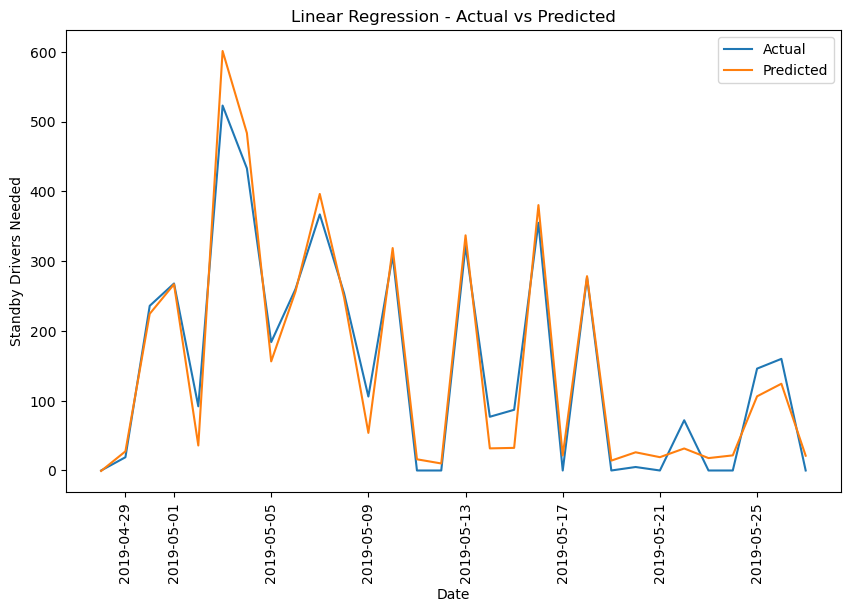

Decision Tree:
 MAE: 4.333333333333333
 RMSE: 9.391485505499118



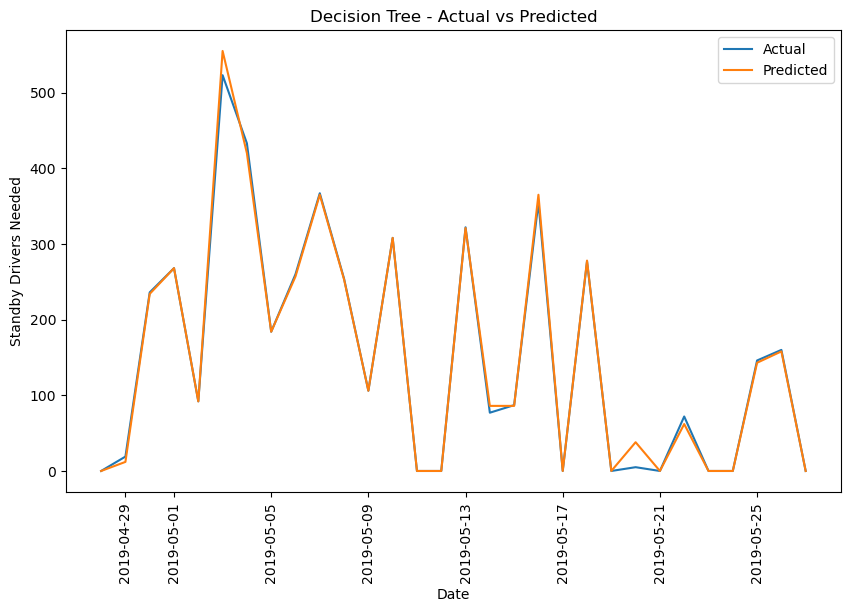

Random Forest:
 MAE: 2.760000000000002
 RMSE: 6.008476235008896



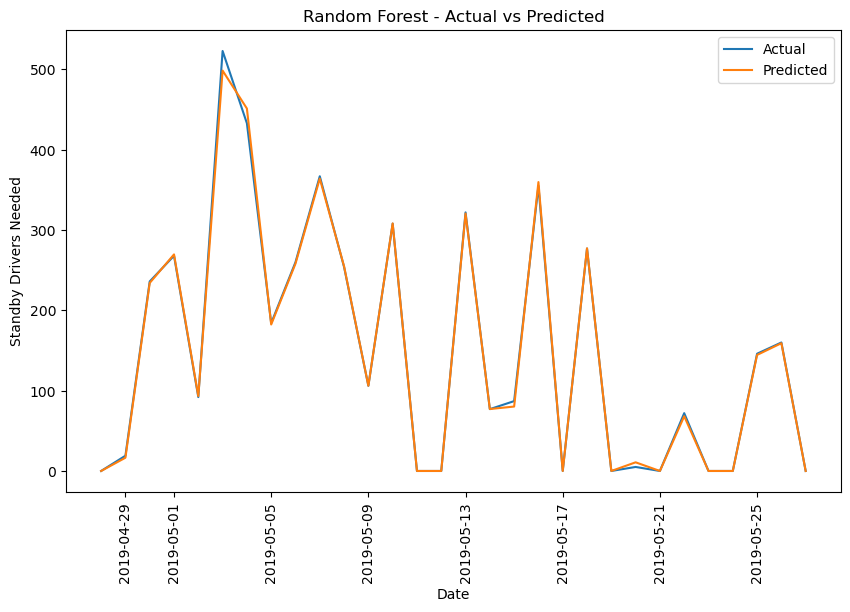

Support Vector Regression:
 MAE: 144.43726252161522
 RMSE: 204.09907910399951



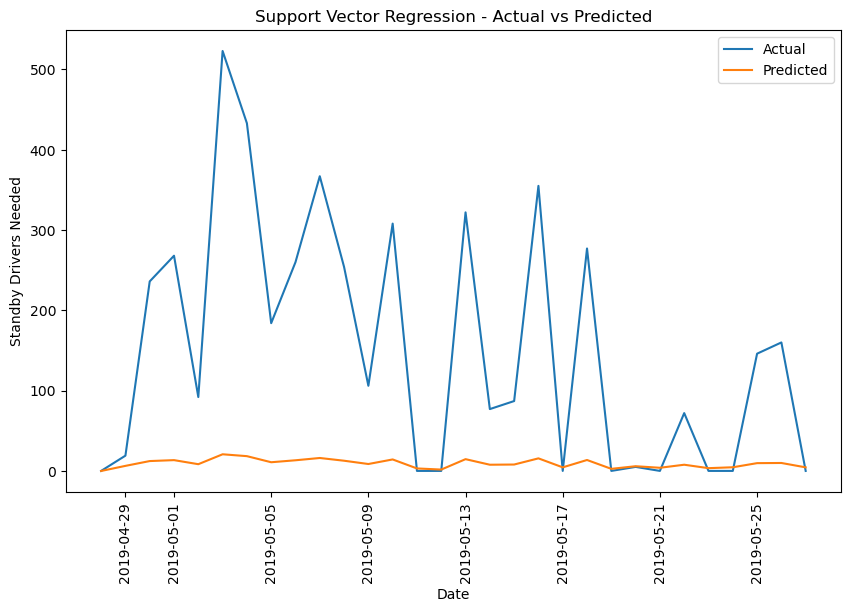

In [4]:
##### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
df = pd.read_csv('sickness_table.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values('date')

# Feature Engineering
df['month'] = df['date'].dt.month

# Prepare the features (X) and the target (y)
X = df.drop(['sby_need', 'date'], axis=1)
y = df['sby_need']

# Split the data into training and testing sets
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    print(f'{name}:\n MAE: {mae}\n RMSE: {rmse}\n')
    
    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'][-30:], y_test, label='Actual')
    plt.plot(df['date'][-30:], predictions, label='Predicted')
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Standby Drivers Needed')
    plt.legend()
    plt.show()